In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [45]:
diabetes = pd.read_csv('diabetes.csv')

In [46]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


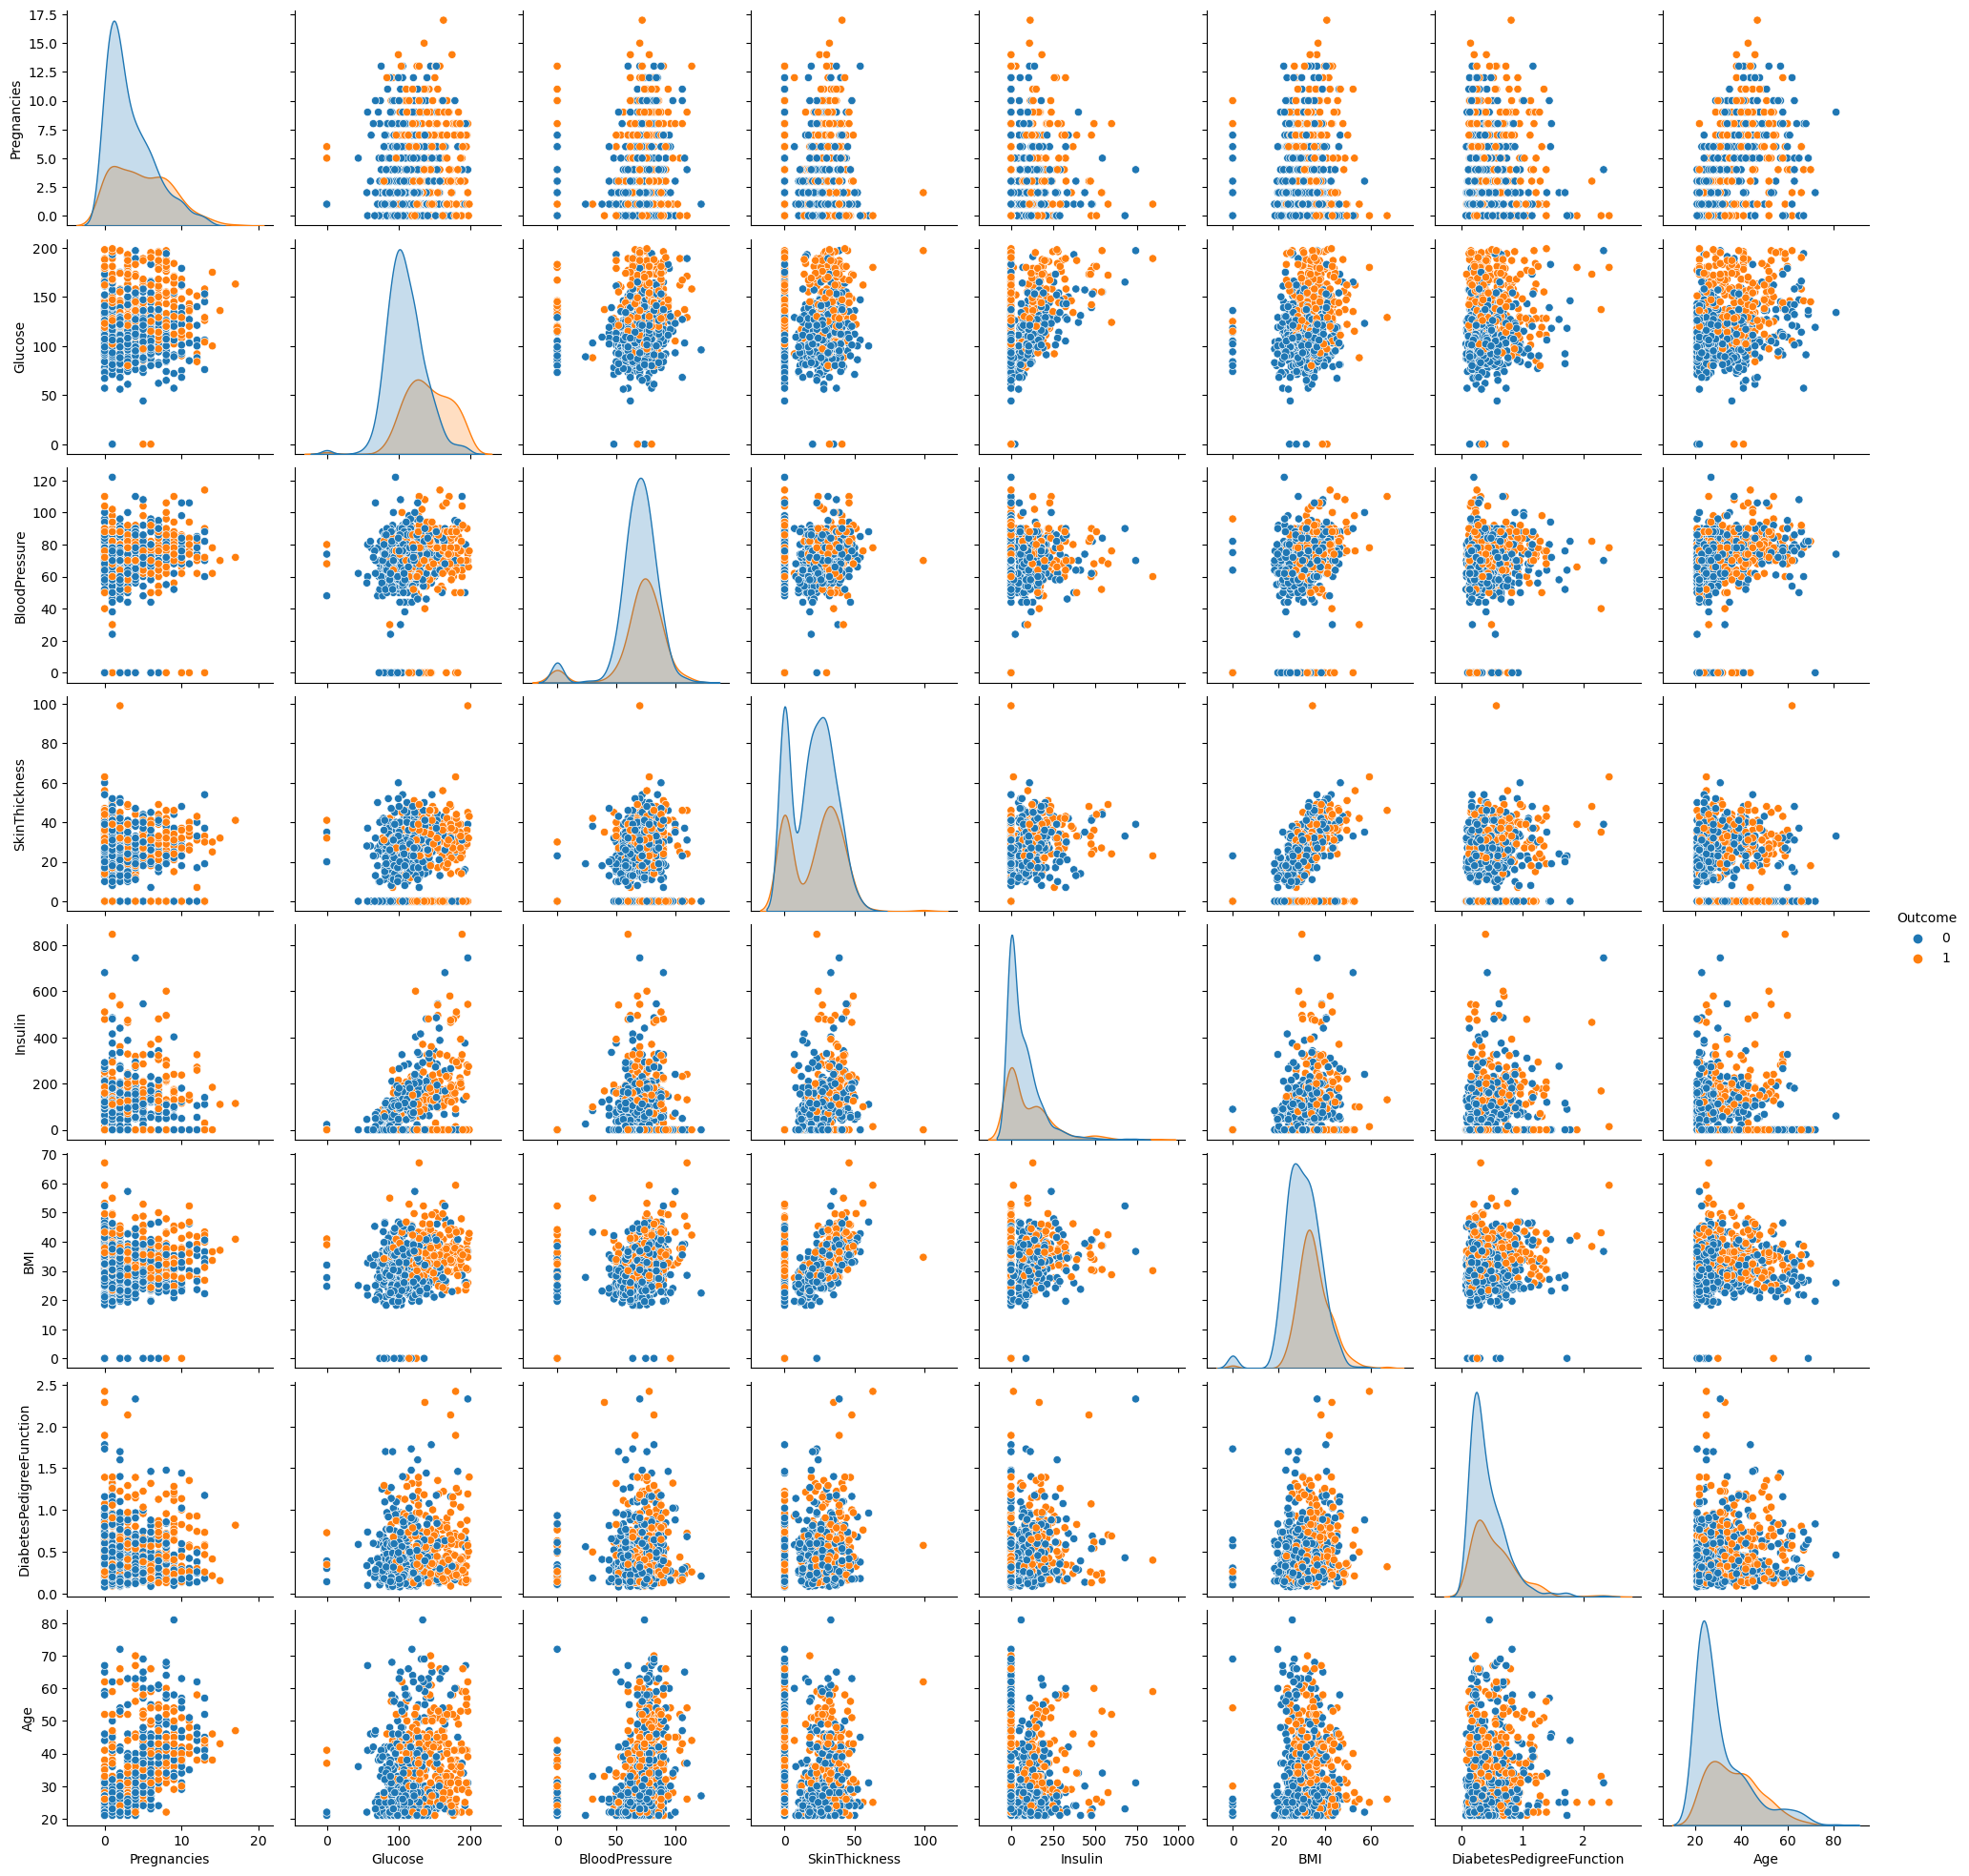

In [48]:
sns.pairplot(data=diabetes, hue='Outcome')

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [49]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

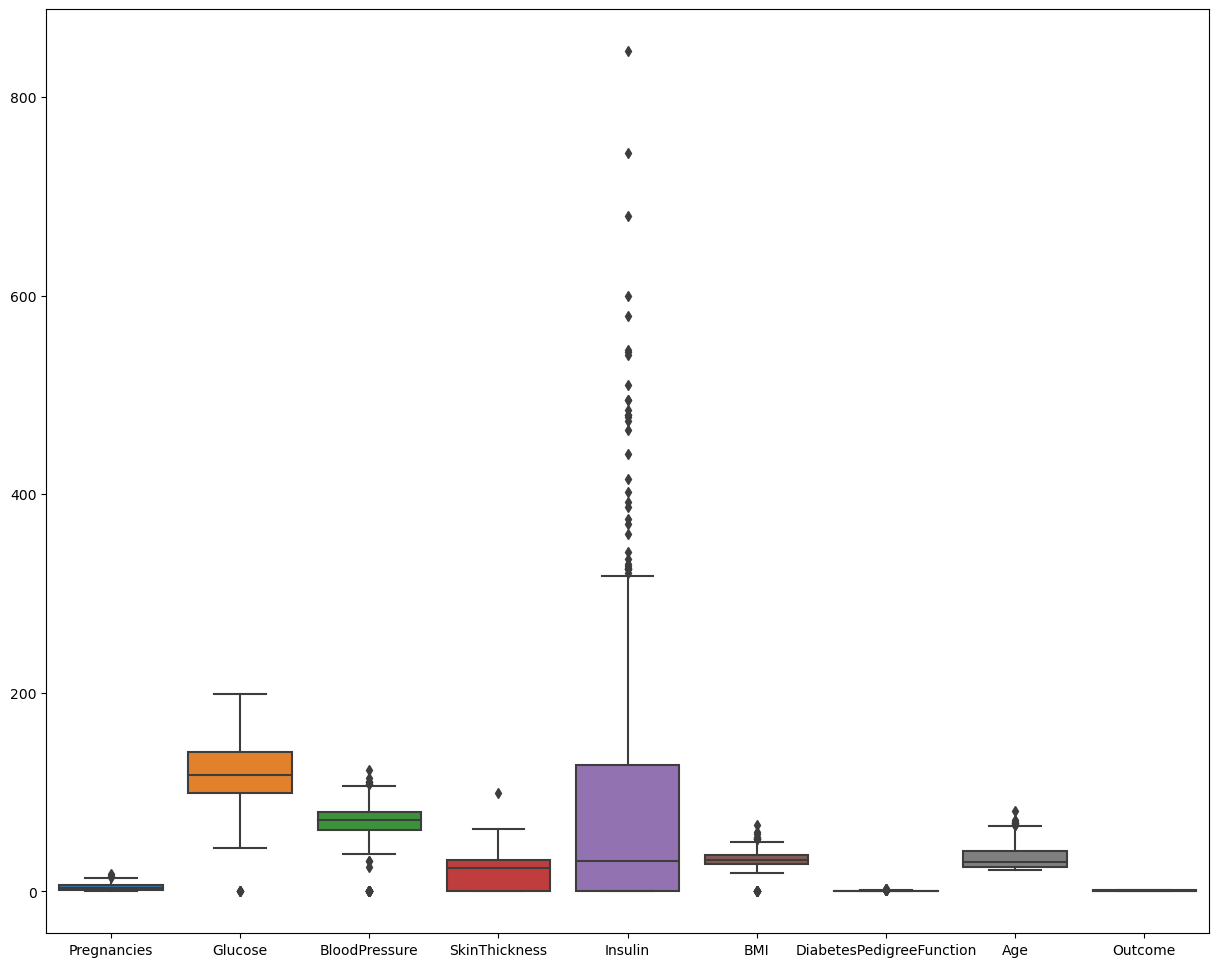

In [50]:
plt.figure(figsize=(15,12))
sns.boxplot(data=diabetes)

In [59]:
def handle_outliers(dataframe, col_name):
    Q1 = np.percentile(dataframe[col_name], 25)
    Q3 = np.percentile(dataframe[col_name], 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5*(iqr)
    upper_bound = Q3 + 1.5*(iqr)
    
    dataframe[col_name] = np.where(dataframe[col_name] > upper_bound, upper_bound, dataframe[col_name])
    
    dataframe[col_name] = np.where(dataframe[col_name] < lower_bound, 0, dataframe[col_name])
    

In [60]:
for col in diabetes.columns:
    handle_outliers(diabetes, col)

<AxesSubplot:>

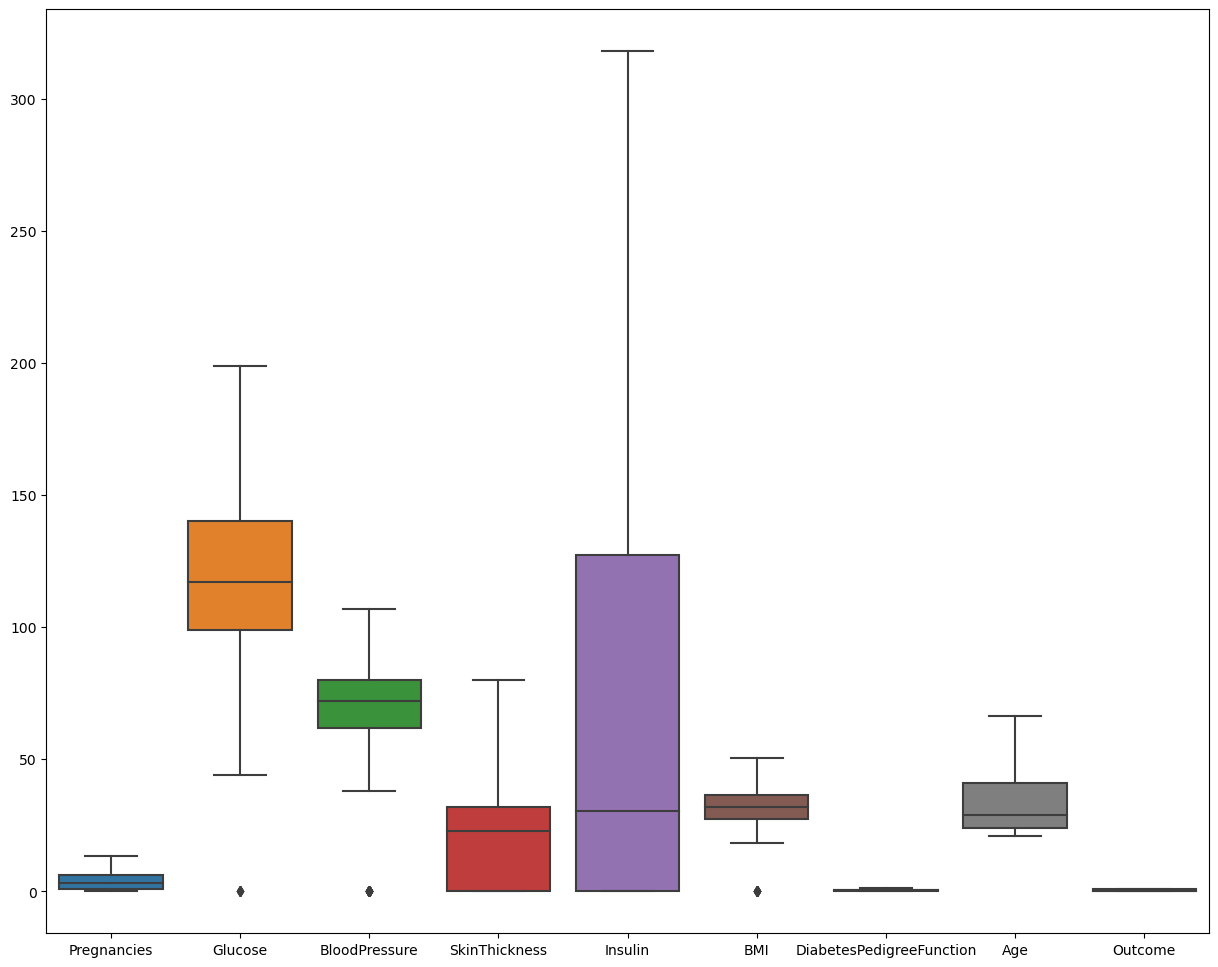

In [61]:
plt.figure(figsize=(15,12))
sns.boxplot(data=diabetes)

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [62]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0


In [63]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [100]:
X.iloc[:,4]

0        0.0
1        0.0
2        0.0
3       94.0
4      168.0
       ...  
763    180.0
764      0.0
765    112.0
766      0.0
767      0.0
Name: Insulin, Length: 768, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use  cross-validation to optimize the hyperparameters and avoid overfitting.

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':['auto', 'sqrt', 'log2']

}

model = DecisionTreeClassifier()

In [70]:
clf = GridSearchCV(model, param_grid=parameter, cv=5)

In [71]:
clf.fit(X_train, y_train)

C:\Users\Suraj Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Suraj Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Suraj Singh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Suraj Singh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnin

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [72]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [73]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='log2', splitter='best')

In [74]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [75]:
y_pred = classifier.predict(X_test)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, roc_curve, roc_auc_score, auc

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127  24]
 [ 35  45]]
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       151
         1.0       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



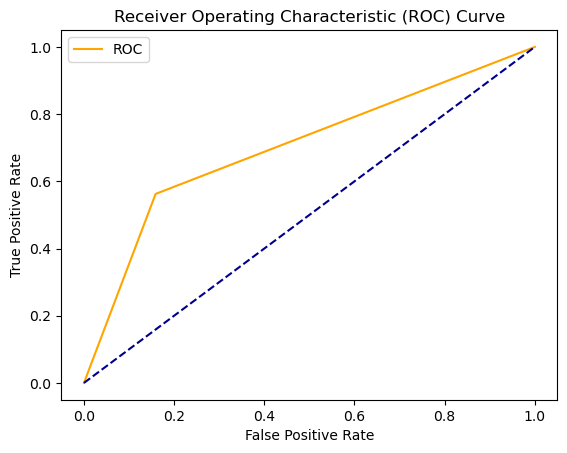

In [89]:
fper, tper, thresholds = roc_curve(y_test, y_pred)

plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [90]:
from sklearn import tree

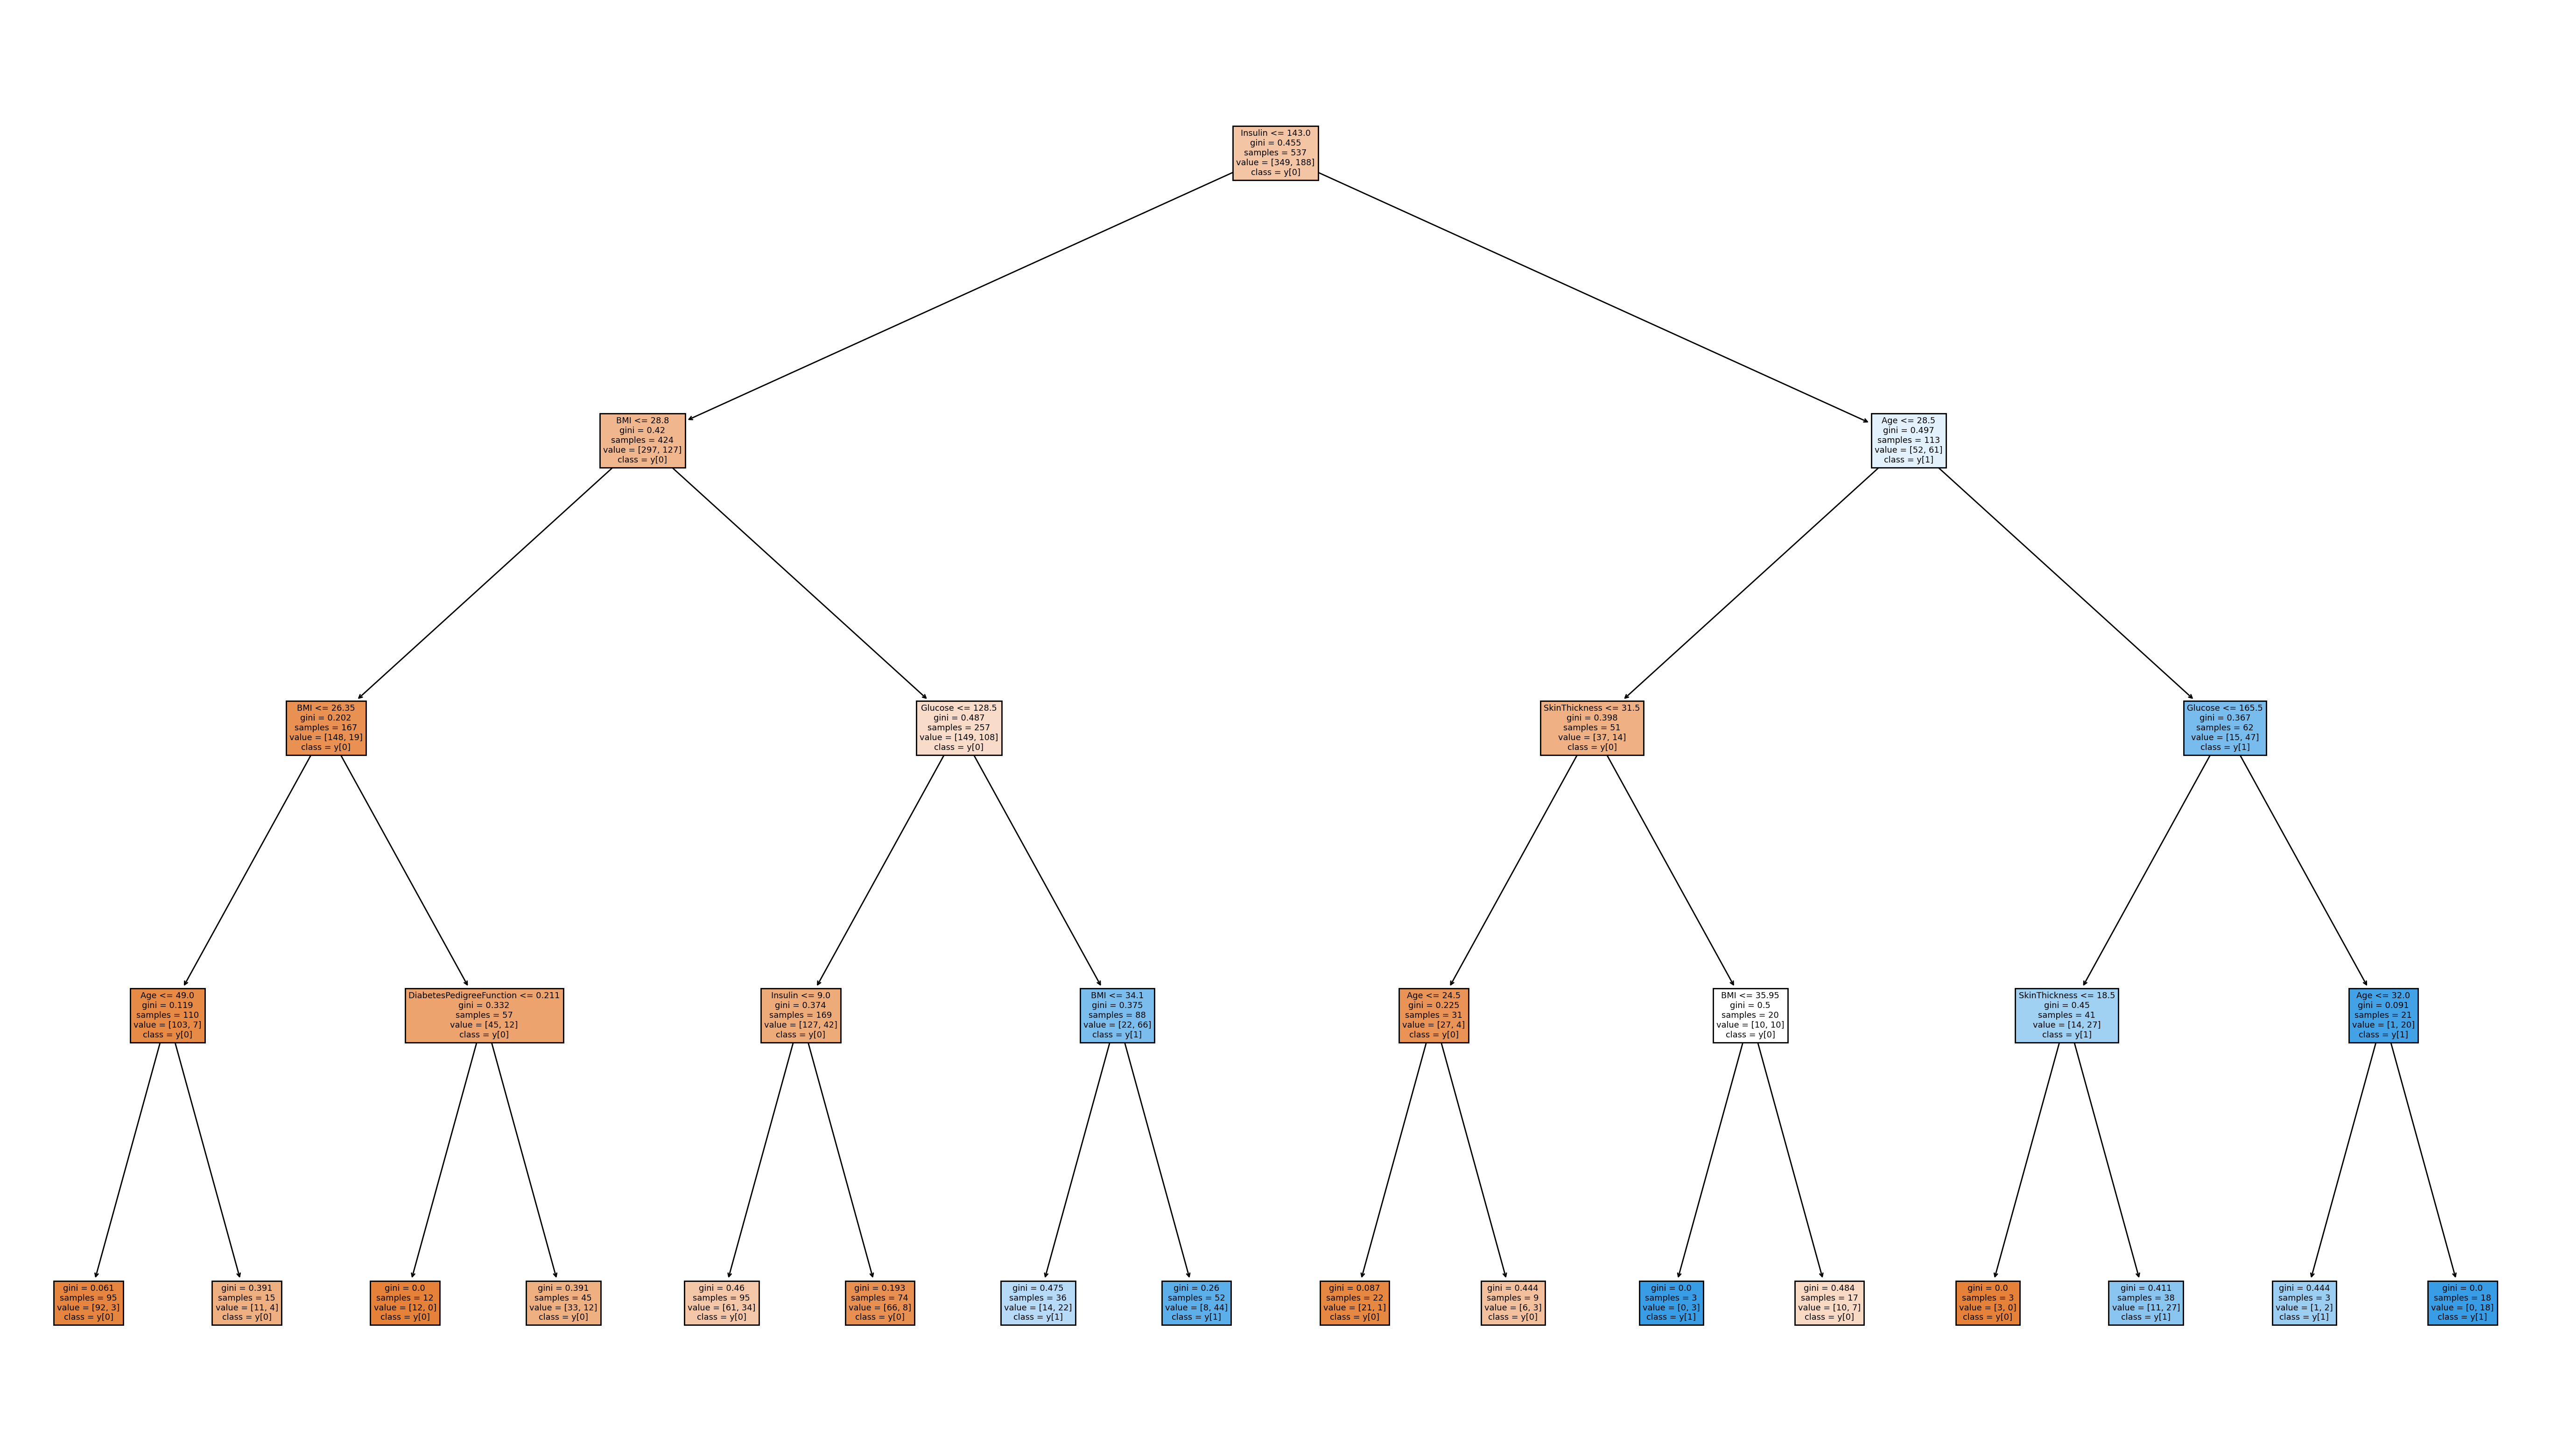

In [103]:
plt.figure(figsize=(35,20), dpi=200)
tree.plot_tree(classifier, filled=True, class_names=True, feature_names=X.columns);

Most important varaiable is Insulin, BMI and Age 
There Thresholds are 143.8, 28.8 and 28.3

Domain Knowledge:

This decision tree suggests that younger customers with lower income may be more impulsive buyers.
Older customers who spend more time on the website might be doing more research before making a purchase.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Validating a decision tree model involves assessing its performance on new or unseen data to ensure that it generalizes well. Sensitivity analysis and scenario testing can help explore how the model behaves under different conditions and identify potential risks or uncertainties. Here's how you can perform these validation steps:

1. **Split the Data**: First, split your dataset into two parts: a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

   ```python
   from sklearn.model_selection import train_test_split

   # Split the data into training and testing sets (e.g., 80% training, 20% testing)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

2. **Train the Decision Tree Model**: Fit the decision tree model using the training data.

   ```python
   from sklearn.tree import DecisionTreeClassifier

   classifier = DecisionTreeClassifier()
   classifier.fit(X_train, y_train)
   ```

3. **Evaluate Model Performance**: Use the testing set to evaluate the model's performance. Common metrics for classification models include accuracy, precision, recall, F1-score, and the ROC curve.

   ```python
   from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

   y_pred = classifier.predict(X_test)

   # Calculate accuracy
   accuracy = accuracy_score(y_test, y_pred)
   print(f"Accuracy: {accuracy:.2f}")

   # Print classification report and confusion matrix
   print(classification_report(y_test, y_pred))
   print(confusion_matrix(y_test, y_pred))
   ```

4. **Sensitivity Analysis**: Sensitivity analysis involves assessing how the model's performance changes with variations in specific input variables or parameters. You can do this by perturbing the input features or hyperparameters and observing the impact on model performance.

   For example, you can vary feature values within a certain range to see how sensitive the model's predictions are to changes in those features.

5. **Scenario Testing**: Scenario testing involves assessing how the model performs under different scenarios or conditions that may arise in the real world. This helps identify potential risks and uncertainties.

   For instance, you can simulate scenarios where certain features have extreme values or where the distribution of the data differs from the training data. This can help you understand how robust the model is to variations in the data.

6. **Cross-Validation**: To further validate the model and reduce the risk of overfitting, consider using techniques like k-fold cross-validation. This involves splitting the data into multiple folds, training and testing the model on different subsets of the data, and averaging the results.

   ```python
   from sklearn.model_selection import cross_val_score

   # Perform k-fold cross-validation
   scores = cross_val_score(classifier, X, y, cv=5)
   print(f"Cross-Validation Scores: {scores}")
   print(f"Mean Accuracy: {scores.mean():.2f}")
   ```

By following these steps, you can validate your decision tree model, assess its robustness, and gain insights into its performance under various conditions and scenarios. This helps ensure that your model is reliable and well-suited for its intended application.